In [ ]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importamos el DataFrame.
path = "/content/drive/MyDrive/Skillnest/ML/CORES/dataset4.csv"
df = pd.read_csv(path)

In [ ]:
# Visualizamos nuestro DataFrame.
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
# Verificar valores nulos
df.isna().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
# Porcentaje de nulos por columna
porcentaje_nulos = df.isna().mean().sort_values(ascending=False) * 100

# Mostrar en forma de tabla
porcentaje_nulos = porcentaje_nulos.round(2).reset_index()
porcentaje_nulos.columns = ["Columna", "Porcentaje de Nulos"]
porcentaje_nulos

,Columna,Porcentaje de Nulos
0,Transaction ID,0.0
1,Date,0.0
2,Customer ID,0.0
3,Gender,0.0
4,Age,0.0
5,Product Category,0.0
6,Quantity,0.0
7,Price per Unit,0.0
8,Total Amount,0.0


In [ ]:
# Tipo de datos por columna
df.dtypes.value_counts()

,count
int64,5
object,4


In [ ]:
# Cantidad de valores unicos por columna
print("\nCantidad de valores únicos por columna:")
print(df.nunique())



Cantidad de valores únicos por columna:
Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64


In [ ]:
# Verificar filas duplicadas
df.duplicated().sum()

np.int64(0)

no hay duplicado ni valores nulos.

In [ ]:
# Descripción de variables numéricas
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,500.50,288.82,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,41.39,13.68,18.0,29.00,42.0,53.00,64.0
Quantity,1000.0,2.51,1.13,1.0,1.00,3.0,4.00,4.0
Price per Unit,1000.0,179.89,189.68,25.0,30.00,50.0,300.00,500.0
Total Amount,1000.0,456.00,560.00,25.0,60.00,135.0,900.00,2000.0


 Análisis Estadístico Descriptivo de Variables Numéricas
Transaction ID
Rango: de 1 a 1000, con una media de 500.5.
Es simplemente un identificador secuencial, no aporta valor analítico directo más allá del orden de las transacciones.

Age (Edad del cliente)
Media: 41.39 años, mediana: 42.
Rango: de 18 a 64 años.
Los compradores son mayoritariamente adultos, con una amplia distribución etaria que permite análisis por segmentos generacionales (jóvenes, adultos, adultos mayores).

Quantity (Cantidad comprada)
Media: 2.51 unidades por transacción.
Mediana: 3, con un mínimo de 1 y máximo de 4.
La mayoría de los clientes compra entre 1 y 4 unidades por transacción. Es una variable discreta con poca dispersión.

Price per Unit (Precio unitario del producto)
Media: 179.89, desviación estándar alta: 189.68.
Rango: de 25 a 500.
Hay productos con gran variabilidad de precio. La media está influenciada por productos de alto costo (como electrónica o ropa).

Total Amount (Monto total de la compra)
Media: 456.00, con una desviación alta de 560.00.
Mediana: 135, máximo: 2,000.
La mayoría de las compras son de bajo o mediano monto, pero existen algunas transacciones de muy alto valor.



In [ ]:
# Descripción de variables categóricas
df.describe(include="object")

,Date,Customer ID,Gender,Product Category
count,1000,1000,1000,1000
unique,345,1000,2,3
top,2023-05-16,CUST1000,Female,Clothing
freq,11,1,510,351


 Análisis de Variables Categóricas
Date (Fecha de la transacción)
Valores únicos: 345 fechas diferentes en 1,000 registros.
Fecha más frecuente: 2023-05-16, con 11 transacciones en ese día.
Las compras están distribuidas a lo largo del tiempo (345 fechas distintas), pero con algunos días de mayor actividad.

Customer ID
Valores únicos: 1,000 (uno por cada registro).
Cada transacción corresponde a un cliente diferente, por lo tanto no hay repetición de clientes.

Gender
Valores únicos: 2 (Male y Female).
Valor más frecuente: Female, con 510 registros.
La distribución de género es bastante equilibrada (51% mujeres, 49% hombres).

Product Category
Valores únicos: 3 (Clothing, Beauty, Electronics).
Categoría más frecuente: Clothing, con 351 registros (≈35%).
La categoría más comprada es ropa, seguida por otras dos categorías.



In [ ]:
# Gráfico Pie Chart para Distribución de Ventas por Categoría de Producto
fig = px.pie(
    df,
    names="Product Category",
    title="Distribución de Ventas por Categoría de Producto",
    hole=0.3
)
fig.update_traces(textinfo="percent+label")
fig.update_layout(title_font_size=18)
fig.show()

El gráfico muestra cómo se distribuyen las transacciones según la categoría del producto comprado.

Según los datos, la categoría Clothing (Ropa) representa la mayor proporción de ventas, seguida por Electronics (Electrónica) y Beauty (Belleza).

Esto indica que la tienda obtiene la mayor parte de sus ventas de productos de vestimenta.


In [ ]:
# Histograma de Distribución de Edad por Género
fig = px.histogram(
    df,
    x="Age",
    color="Gender",
    nbins=20,
    title="Distribución de Edad por Género"
)
fig.update_layout(bargap=0.1, title_font_size=18)
fig.show()

El histograma muestra cómo se distribuyen las edades de los clientes, segmentadas por género (masculino y femenino).

La mayoría de los clientes se concentra entre los 25 y 55 años.
Ambos géneros están presentes en casi todos los rangos etarios, y no se observa una diferencia drástica entre hombres y mujeres.

In [ ]:
# Box plot de Distribución del Monto Total de Compra por Género
fig = px.box(
    df,
    x="Gender",
    y="Total Amount",
    color="Gender",
    title="Distribución del Monto Total de Compra por Género",
    points="all"  # Muestra todos los puntos individuales para ver outliers
)
fig.update_layout(title_font_size=18)
fig.show()

Este boxplot muestra cómo varía el gasto total por transacción entre hombres y mujeres.

Se puede observar la mediana del gasto en cada grupo, el rango intercuartílico, y los valores atípicos, es decir, compras con montos inusualmente altos.


In [ ]:
#  Análisis de correlación y mapa de calor

# Para calcular la matriz de correlación, necesito solo las variables númericas, entonces las separare a continuación

cols_numericas = ["Age", "Quantity", "Price per Unit", "Total Amount"]

df_numeric = df[cols_numericas]

In [ ]:
# Calcular matriz de correlación con método Pearson

correlation_matrix = df_numeric.corr(method='pearson')
print(correlation_matrix)

                     Age  Quantity  Price per Unit  Total Amount
Age             1.000000 -0.023737       -0.038423     -0.060568
Quantity       -0.023737  1.000000        0.017501      0.373707
Price per Unit -0.038423  0.017501        1.000000      0.851925
Total Amount   -0.060568  0.373707        0.851925      1.000000


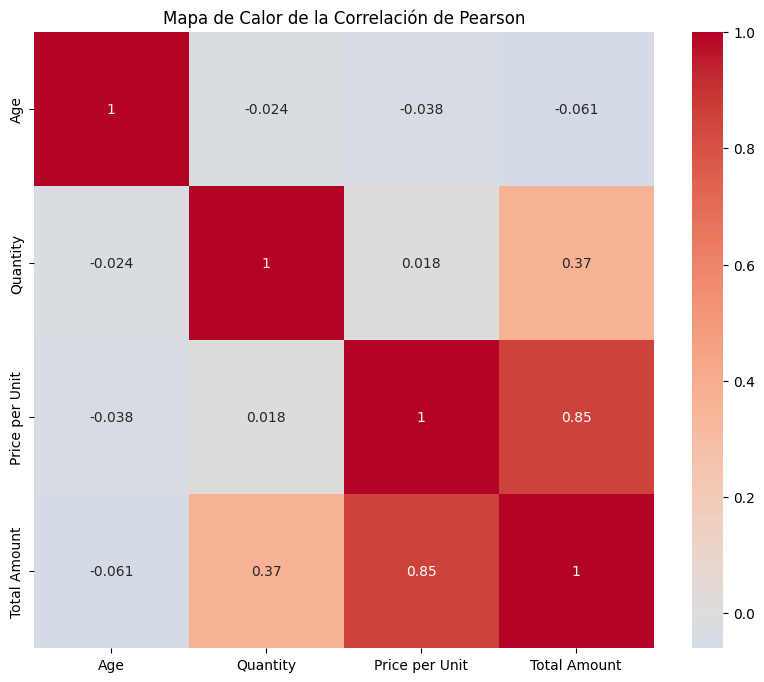

In [ ]:
# Crear mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

Resumen de Hallazgos
El dataset contiene 9 variables, de las cuales 4 son numéricas (Age, Quantity, Price per Unit, Total Amount) y 5 categóricas (Date, Customer ID, Gender, Product Category, Transaction ID como identificador).

No se detectaron valores nulos, lo que facilita el análisis directo sin necesidad de imputación.

Las variables con mayor presencia de outliers son:

Price per Unit y Total Amount, donde se observaron valores extremos (precios altos o montos de compra superiores a lo habitual), especialmente en productos costosos como ropa o electrónica.

Las correlaciones más fuertes se observaron entre:

Quantity y Total Amount, y entre Price per Unit y Total Amount, lo cual es esperable, ya que ambas determinan el monto total de la compra.

Se identificaron los siguientes desafíos:

Distribución desigual de categorías: predominancia de ciertos productos como ropa.